In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))\

import numpy as np
import GPy
try:
    from google.colab import files
    uploaded = files.upload()
except ImportError:
    pass
    
from matplotlib import pyplot as plt

%matplotlib inline

In [23]:
period = np.array([1, 1, 1, 1, 1, 0, 0]).reshape(-1, 1)
Y = np.concatenate([period, period, period, period])#, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period])
rows, _ = Y.shape
X = np.linspace(0, rows-1, rows).reshape(-1, 1)
Y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]])

GP_regression.,value,constraints,priors
mul.bias.variance,1.5723040033359752,+ve,
mul.periodic_Matern52.variance,0.5904787110045936,+ve,
mul.periodic_Matern52.lengthscale,2.5263003342803096,+ve,
mul.periodic_Matern52.period,7.31079798330012,+ve,
Gaussian_noise.variance,0.6030680223594126,+ve,


 /m/home/home2/27/holopaj7/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


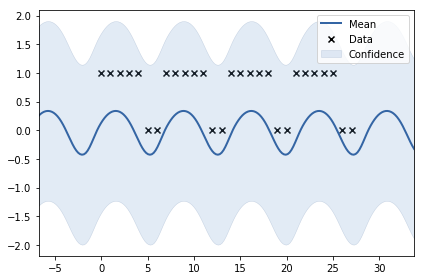

In [24]:
PERIODIC = GPy.kern.PeriodicExponential(input_dim=1, variance=1, lengthscale=3, period=7)
MATERN = GPy.kern.PeriodicMatern52(input_dim=1, variance=1, lengthscale=3, period=7)
BIAS = GPy.kern.Bias(input_dim=1, variance=2)

m = GPy.models.GPRegression(X, Y, BIAS*MATERN)
m.optimize()
display(m)

m.plot()